### Table of Contents

1. [Dataset](#data)
2. [Text Preprocessing](#text)
3. [Model](#model)
4. [Data Visualization](#viz)
5. [Results](#results)

### Import Libraries

In [2]:
import pandas as pd
import re
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
stopwords = set((stopwords.words("english")))

### Dataset  <a name="data"></a>


Our twitter dataset consists of 32,000 tweets, which we will analyze to find which have a negative sentiment.
<br>
<br>
The target variable in this is set is **label**, which gives negative tweets a **1**, and anything else a **0**. This label is what we are trying to predict.

In [3]:
data = pd.read_csv("tweets_data.csv")

In [19]:
tweet = pd.read_csv("tweets_data.csv", usecols = ["label", "tweet"])
tweet.head(10)
#tweet.shape

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
5,0,[2/2] huge fan fare and big talking before the...
6,0,@user camping tomorrow @user @user @user @use...
7,0,the next school year is the year for exams.ð...
8,0,we won!!! love the land!!! #allin #cavs #champ...
9,0,@user @user welcome here ! i'm it's so #gr...


In [29]:
# Create test and train sets

from sklearn.model_selection import train_test_split
tweet_train, tweet_Test, label_train, label_Test = train_test_split(tweet.tweet, tweet.label, test_size = 0.2)

In [30]:
tweet_train.shape, tweet_Test.shape

((25569,), (6393,))

### Text Preprocessing <a name="text"></a>

Since tweets are coming in from different users, different locations, etc., it's important to clean the raw data in a way that our model will comprehend everything that is being put into it. This may sound simple, but a lot of text data can contain repetitive and redundant words. Filtering what's meaningful from what's not without sacrificing the meaning of the tweet is a delicate task that models today have trouble balancing.

In [31]:
def to_lower(word):
    result = word.lower()
    return result

def remove_hyperlink(word):
    return  re.sub(r"http\S+", "", word)

def remove_mentions(word):
    return re.sub(r"@\S+", "", word)

def remove_number(word):
    result = re.sub(r'\d+', '', word)
    return result

def remove_punctuation(word):
    result = re.sub('[^A-Za-z]+', ' ', word)
    return result

def remove_whitespace(word):
    result = word.strip()
    return result

def replace_newline(word):
    return word.replace('\n','')

def remove_stopwords(word):
    return ' '.join(word for word in i.split() if word not in stopwords)



def clean_up_pipeline(sentence):
    cleaning_data = [remove_hyperlink,
                      replace_newline,
                      to_lower,
                      remove_number,
                      remove_punctuation,
                      remove_whitespace]
    for func in cleaning_data:
        
        sentence = func(sentence)
    return sentence

print(tweet_train)
tweet_train = tweet_train.apply(clean_up_pipeline)

print(tweet_train)

9246     @user has your body, the bodies of your genera...
25248             @user smile with my   #dog. #dogsarejoy 
26503    so #honored and   to have this chick @user cut...
17755    post bihday gift :)))) happy bihday to meeeeee...
9594      @user two weeks from today we're leaving for ...
                               ...                        
31666    @user    and the industry is completely able t...
4241     when you finish season 4 of orange is the new ...
26955    good morning ! ó¾ #hello #goodmorning  day #...
18433     @user rotterdam â¢ socafrenzy â¢  ðð¿ð...
6225                                         mood =   ð»
Name: tweet, Length: 25569, dtype: object
9246     user has your body the bodies of your generati...
25248                    user smile with my dog dogsarejoy
26503    so honored and to have this chick user cutting...
17755             post bihday gift happy bihday to meeeeee
9594     user two weeks from today we re leaving for gr...
              

### Tokenization

Tokenization is the process of splitting text into smaller chunks called tokens. These tokens are now used as features in our models.

In [32]:
from nltk.tokenize import word_tokenize
tweet_train = tweet_train.apply(word_tokenize)

In [33]:
tweet_train

9246     [user, has, your, body, the, bodies, of, your,...
25248             [user, smile, with, my, dog, dogsarejoy]
26503    [so, honored, and, to, have, this, chick, user...
17755     [post, bihday, gift, happy, bihday, to, meeeeee]
9594     [user, two, weeks, from, today, we, re, leavin...
                               ...                        
31666    [user, and, the, industry, is, completely, abl...
4241     [when, you, finish, season, of, orange, is, th...
26955    [good, morning, hello, goodmorning, day, enjoy...
18433            [user, rotterdam, socafrenzy, dj, djlife]
6225                                                [mood]
Name: tweet, Length: 25569, dtype: object

### Stemming

Stemming consists of removing and replacing suffixes from a word/token to obtain the root or base of a word.

In [34]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text])
tweet_train = tweet_train.apply(lambda text: stem_words(text))

tweet_train

9246     user ha your bodi the bodi of your gener been ...
25248                    user smile with my dog dogsarejoy
26503    so honor and to have thi chick user cut bass o...
17755             post bihday gift happi bihday to meeeeee
9594     user two week from today we re leav for greec ...
                               ...                        
31666    user and the industri is complet abl to develo...
4241     when you finish season of orang is the new bla...
26955    good morn hello goodmorn day enjoy instaquot f...
18433                  user rotterdam socafrenzi dj djlife
6225                                                  mood
Name: tweet, Length: 25569, dtype: object

### Cleaning of Raw Data

This section consists of deleting words or characters that do not add value to the meaning of the text.

#### Lowercase

This step is essential for several reasons. The main reason is that the words "PEOPLE", "people", and "PeOpLe" are all the same word and add the same value to a sentence. Lowering the case of all the words helps to reduce the dimensions by decreasing the size of the vocabulary.

In [35]:
tweet.tweet = tweet.tweet.str.lower()

tweet

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


#### Remove "@" Mentions

On Twitter, finding a mention is very easy. However, they don't add value to interpreting the sentiment of a tweet; let's remove them.

In [36]:
p = []

for i in tweet.tweet:
    p.append(re.sub(r"@\S+", "", i))
tweet.tweet = p


tweet

,label,tweet
0,0,when a father is dysfunctional and is so sel...
1,0,thanks for #lyft credit i can't use cause th...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate isz that youuu?ððððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"#sikh #temple vandalised in in #calgary, #wso..."


#### Remove URLs

In [37]:
p = []

for i in tweet.tweet:
    p.append(re.sub(r"http\S+", "", i))
tweet.tweet = p

tweet

,label,tweet
0,0,when a father is dysfunctional and is so sel...
1,0,thanks for #lyft credit i can't use cause th...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate isz that youuu?ððððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"#sikh #temple vandalised in in #calgary, #wso..."


#### Remove any special characters

Let's remove any special character that can possibly impede our model's ability to understand a tweet's sentiment.

In [38]:
p = []

for sentence in tweet.tweet:
    p.append(re.sub('[^A-Za-z]+', ' ', sentence))
tweet.tweet = p

tweet

,label,tweet
0,0,when a father is dysfunctional and is so self...
1,0,thanks for lyft credit i can t use cause they...
2,0,bihday your majesty
3,0,model i love u take with u all the time in ur
4,0,factsguide society now motivation
...,...,...
31957,0,ate isz that youuu
31958,0,to see nina turner on the airwaves trying to ...
31959,0,listening to sad songs on a monday morning otw...
31960,1,sikh temple vandalised in in calgary wso cond...


#### Removing stopwords

Stopwords are commonly occurring words in a language, such as ‘the’, ‘a’, ‘an’, ‘is’ etc. We can remove them here because they won’t provide any valuable information for our Twitter data analysis.

In [39]:
no_stopwords=[]
for i in tweet.tweet:
    no_stopwords.append(' '.join(word for word in i.split() if word not in stopwords))
tweet.tweet = no_stopwords
tweet

,label,tweet
0,0,father dysfunctional selfish drags kids dysfun...
1,0,thanks lyft credit use cause offer wheelchair ...
2,0,bihday majesty
3,0,model love u take u time ur
4,0,factsguide society motivation
...,...,...
31957,0,ate isz youuu
31958,0,see nina turner airwaves trying wrap mantle ge...
31959,0,listening sad songs monday morning otw work sad
31960,1,sikh temple vandalised calgary wso condemns act


### Word Embedding

In [40]:
import gensim

tokenize=tweet_train.apply(lambda x: x.split())
w2vec_model=gensim.models.Word2Vec(tokenize,min_count = 1, size = 100, window = 5, sg = 1)
w2vec_model.train(tokenize,total_examples= len(tweet_train),epochs=20)

(5337023, 6638320)

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

row=CountVectorizer( min_df=2, max_features=1000)
row.fit(tweet_train)
row_df=row.transform(tweet_train).toarray()

In [42]:
row_df.shape

(25569, 1000)

## Model <a name="model"></a>

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
import numpy as np
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score

In [44]:
label_train = np.array(label_train)

In [45]:
lreg = LogisticRegression()
lreg.fit(row_df, np.array(label_train)) # training the model

prediction = lreg.predict_proba(row_df) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(label_train, prediction_int)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6640459631085576

In [46]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

cf_matrix =  confusion_matrix(label_train, prediction_int)

tn, fp, fn, tp = confusion_matrix(label_train, prediction_int).ravel()

# Create the 
print("Precision: {:.2f}%".format(100 * precision_score(label_train, prediction_int)))
print("Recall: {:.2f}%".format(100 * recall_score(label_train, prediction_int)))
print("F1 Score: {:.2f}%".format(100 * f1_score(label_train,prediction_int)))


Precision: 72.52%
Recall: 61.24%
F1 Score: 66.40%


In [47]:
# Try several models

model_list = [LogisticRegression(), GaussianNB(), SVC(kernel = 'linear', probability = True)]

In [48]:
for model in model_list:
    model.fit(row_df, np.array(label_train))
    prediction = model.predict_proba(row_df) # predicting on the validation set
    prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 then 1, else 0
    prediction_int = prediction_int.astype(np.int)

    f1score=f1_score(label_train, prediction_int) 
    print(f1score)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6640459631085576
0.21862792968750003
0.6310051107325383


#### Data Visualization <a name="viz"></a>

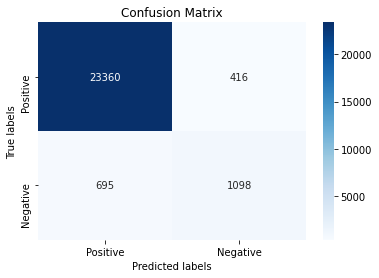

In [49]:
# Use a confusion matrix to visualize model performance

import seaborn as sns
import matplotlib.pyplot as plt

ax= plt.subplot()
#annot=True to annotate cells
sns.heatmap(cf_matrix, annot=True, ax = ax,cmap='Blues',fmt='');

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);

### Results <a name="results"></a>

With an F1-score of **66.42%**, the model performs well, but there is much room for improvement. In a second attempt, I would implement a DNN that could better comprehend the relationship between text and sentiment (although this could be computationally expensive).
<br>
<br>
Additionally, this model simply performed based on the training dataset. Keep in mind that most sentiment analysis models that currently exist on the internet are being applied to real-world data that is coming in real-time. This models have simply seen more data and have been able to generalize and be tuned to operate at higher level. 